In [1]:
import pystan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
stan_code = """
data {
    int T;
    int T_pred;
    vector[T] Y;
}

parameters{
    vector[T] mu;
    real<lower=0> s_mu;
    real<lower=0> s_Y;
}

model{
    mu[2:T] ~ normal(mu[1:(T-1)], s_mu);
    Y ~ normal(mu, s_Y);
}

generated quantities{
    vector[T+T_pred] mu_all;
    vector[T_pred] y_pred;
    mu_all[1:T] = mu;
    for (t in 1:T_pred){
        mu_all[T+t] = normal_rng(mu_all[T+t-1], s_mu);
        y_pred[t] = normal_rng(mu_all[T+t], s_Y);
    }
}
"""

In [3]:
data = pd.read_csv("data-ss1.txt")

In [4]:
data = data["Y"]

In [5]:
data

0     11.2
1     11.0
2     11.3
3     10.8
4     10.8
5     11.3
6     11.1
7     11.0
8     11.4
9     11.7
10    12.5
11    12.6
12    12.8
13    13.0
14    13.0
15    13.6
16    13.3
17    12.6
18    13.1
19    12.6
20    12.1
Name: Y, dtype: float64

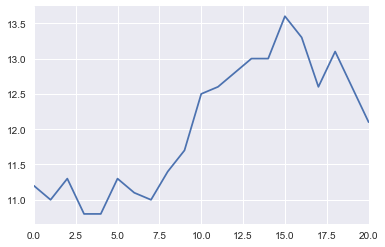

In [6]:
data.plot()

In [7]:
d = {"Y":list(data.values), "T":data.shape[0], "T_pred":3}
d

{'T': 21,
 'T_pred': 3,
 'Y': [11.199999999999999,
  11.0,
  11.300000000000001,
  10.800000000000001,
  10.800000000000001,
  11.300000000000001,
  11.1,
  11.0,
  11.4,
  11.699999999999999,
  12.5,
  12.6,
  12.800000000000001,
  13.0,
  13.0,
  13.6,
  13.300000000000001,
  12.6,
  13.1,
  12.6,
  12.1]}

In [8]:
sm = pystan.StanModel(model_code=stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f58034fc739f7074ee30f196c12c3f49 NOW.


In [9]:
fit = sm.sampling(data=d, iter=1000, chains=4)

RuntimeError: Exception: Don't do this  (in 'unkown file name' at line 15)
